In [33]:
import pandas as pd 
import wandb
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.ticker import FormatStrFormatter, MaxNLocator
from scipy.stats import norm
from PIL import Image, ImageEnhance

import seaborn as sns
sns.set_style("white")
sns.set(context='notebook',
        style='ticks',
        font_scale=1,
        rc={'axes.grid':True,
            'grid.color':'.9',
            'grid.linewidth':0.75})

import sys
import os
sys.path.insert(1, os.path.dirname(os.getcwd()))

In [4]:
fontsize = 20
labelsize = 18
lw = 4
markersize = 8

In [3]:
df_pacs = pd.read_csv("results/02_pacs.csv")
dfs_list = [df_mnist, df_pacs]

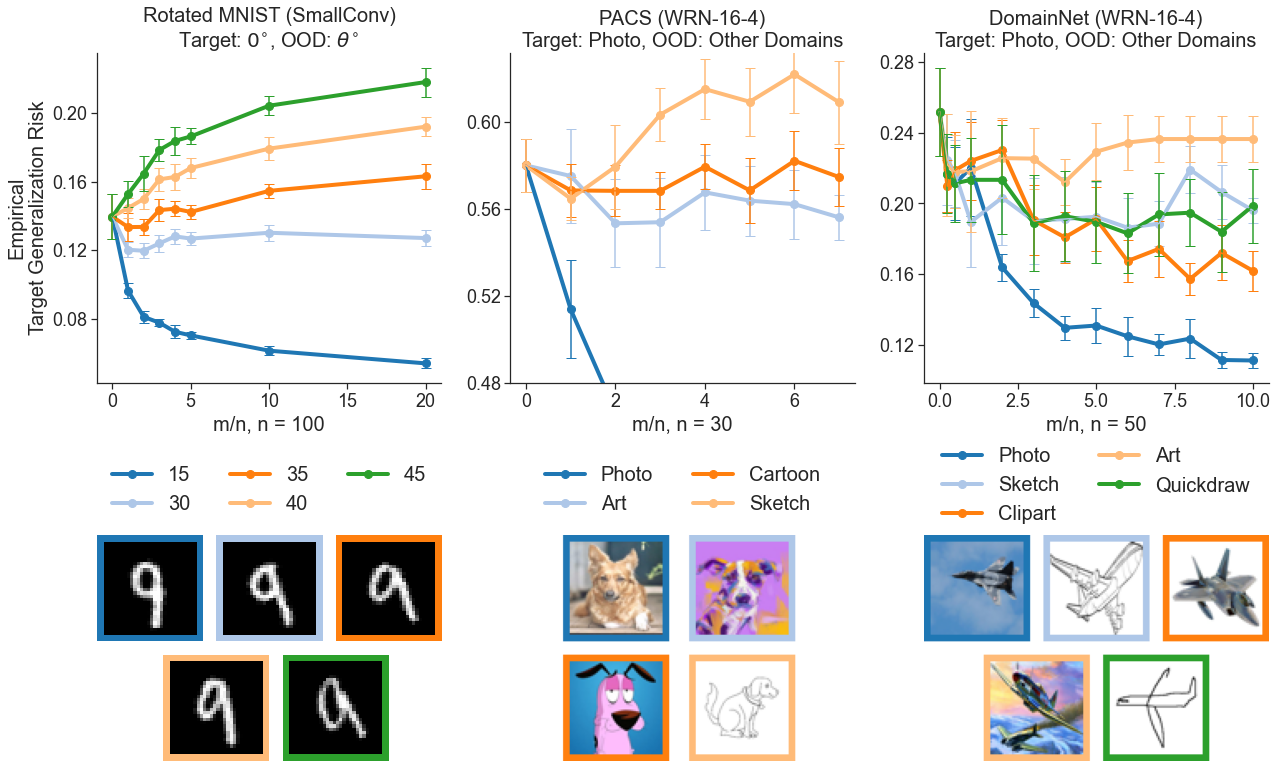

In [80]:
# rotated mnist 
fontsize = 22
labelsize = 20
lw = 4
markersize = 8

fig, axes = plt.subplots(2, 3, figsize=((21, 14)))

# MNIST curves
ax = axes[0][0]
df_mnist = pd.read_csv("results/01_rotated_mnist.csv")

env_list = [15, 30, 35, 40, 45]
reps = 10
n = 100

cmap = [plt.cm.tab20(i) for i in range(len(env_list))]
fontsize = 20
labelsize = 18

for i, env in enumerate(env_list):
    df = df_mnist[df_mnist['ood'] == env].reset_index(drop=True)

    m_n = df['m_n'].to_numpy()
    avg_error = df['avg_error'].to_numpy()
    std_error = df['std_error'].to_numpy()
    ci = 1.96 * std_error / np.sqrt(reps)
    ax.plot(m_n, avg_error, color=cmap[i], label=env_list[i], lw=lw, marker='o', markersize=markersize)
    ax.errorbar(m_n, avg_error, yerr=ci, color=cmap[i], solid_capstyle='projecting', capsize=5)
    ax.set_ylabel("Empirical" + "\n" + "Target Generalization Risk", fontsize=fontsize)
    
    ax.set_xlabel("m/n, n = {}".format(n), fontsize=fontsize)
    ax.set_title(r"Rotated MNIST (SmallConv)" + "\n" + r"Target: $0^{\circ}$, OOD: $\theta^{\circ}$", fontsize=fontsize)

    ax.tick_params(axis='x', labelsize=labelsize)
    ax.tick_params(axis='y', labelsize=labelsize)
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.grid(False)

legend = ax.legend(bbox_to_anchor=(0.5, -0.45), loc=8, ncol=3, fontsize=fontsize, frameon=False)
# legend.get_title().set_fontsize(fontsize)

# PACS curves
ax = axes[0][1]
df_pacs = pd.read_csv("results/02_pacs.csv")

env_list = ["P", "A", "C", "S"]
env_long_list = ["Photo", "Art", "Cartoon", "Sketch"]
n = 30
reps = 10

cmap = [plt.cm.tab20(i) for i in range(len(env_list))]

for i, env in enumerate(env_list):
    df = df_pacs[df_pacs['ood'] == env].reset_index(drop=True)

    m_n = df['m_n'].to_numpy()
    avg_error = df['avg_error'].to_numpy()
    std_error = df['std_error'].to_numpy()
    ci = 1.96 * std_error / np.sqrt(reps)
    m_n = m_n[:8]
    avg_error = avg_error[:8]
    ci = ci[:8]
    ax.plot(m_n, avg_error, color=cmap[i], label=env_long_list[i], lw=lw, marker='o', markersize=markersize)
    ax.errorbar(m_n, avg_error, yerr=ci, color=cmap[i], solid_capstyle='projecting', capsize=5)
    # ax.set_ylabel("Target Generalization Error", fontsize=fontsize)
    ax.set_ylim([0.48, avg_error.max()+0.01])
    
    ax.set_xlabel("m/n, n = {}".format(n), fontsize=fontsize)
    ax.set_title("PACS (WRN-16-4)" + "\n" + "Target: Photo, OOD: Other Domains", fontsize=fontsize)

    ax.tick_params(axis='x', labelsize=labelsize)
    ax.tick_params(axis='y', labelsize=labelsize)
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.grid(False)

legend = ax.legend(bbox_to_anchor=(0.5, -0.45), loc=8, ncol=2, fontsize=fontsize, frameon=False)
legend.get_title().set_fontsize(fontsize)

sns.despine()


# DomainNet curves
ax = axes[0][2]
df_dom = pd.read_csv("results/03_domainnet.csv")

env_list = ["P", "S", "C", "A", "Q"]
env_long_list = ["Photo", "Sketch", "Clipart", "Art", "Quickdraw"]
n = 50
reps = 10

cmap = [plt.cm.tab20(i) for i in range(len(env_list))]

for i, env in enumerate(env_list):
    df = df_dom[df_dom['ood'] == env].reset_index(drop=True)

    m_n = df['m_n'].to_numpy()
    avg_error = df['avg_error'].to_numpy()
    std_error = df['std_error'].to_numpy()
    ci = 1.96 * std_error / np.sqrt(reps)
    ax.plot(m_n, avg_error, color=cmap[i], label=env_long_list[i], lw=lw, marker='o', markersize=markersize)
    ax.errorbar(m_n, avg_error, yerr=ci, color=cmap[i], solid_capstyle='projecting', capsize=5)
    
    ax.set_xlabel("m/n, n = {}".format(n), fontsize=fontsize)
    ax.set_title("DomainNet (WRN-16-4)" + "\n" + "Target: Photo, OOD: Other Domains", fontsize=fontsize)

    ax.tick_params(axis='x', labelsize=labelsize)
    ax.tick_params(axis='y', labelsize=labelsize)
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.grid(False)

legend = ax.legend(bbox_to_anchor=(0.5, -0.48), loc=8, ncol=2, fontsize=fontsize, frameon=False)
legend.get_title().set_fontsize(fontsize)

sns.despine()


# MNIST OOD domains
ax = axes[1][0]
ax.grid(False)

loc_list = [(0,0), (36, 0), (72, 0), (20, 36), (56, 36)]
env_list = [15, 30, 35, 40, 45]

collage = Image.fromarray(255*np.ones((68,104,3),dtype="uint8"), mode="RGB")
for i, env in enumerate(env_list):
    im = Image.open("figures/mnist/{}.png".format(env))
    collage.paste(im, loc_list[i])
ax.imshow(collage)
ax.axis('off')

# PACS OOD domains
ax = axes[1][1]
ax.grid(False)

loc_list = [(32,0), (108, 0), (32,72), (108, 72)]
env_list = ["P", "A", "C", "S"]
cmap = [plt.cm.tab20(i) for i in range(len(env_list))]
collage = Image.fromarray(255*np.ones((136,208,3),dtype="uint8"), mode="RGB")
for i, env in enumerate(env_list):
    pad = np.zeros((64, 64, 3))
    pad[:, :, 0] = cmap[i][0]
    pad[:, :, 1] = cmap[i][1]
    pad[:, :, 2] = cmap[i][2]
    pad = np.array(255*pad, dtype="uint8")
    pad = Image.fromarray(pad, mode="RGB")
    im = Image.open("figures/pacs/{}.jpg".format(env))
    im = im.resize((56, 56))
    pad.paste(im, (4, 4))
    collage.paste(pad, loc_list[i])
ax.imshow(collage)
ax.axis('off')

# DomainNet OOD domains
ax = axes[1][2]
ax.grid(False)

loc_list = [(0,0), (72, 0), (144, 0), (36, 72), (108, 72)]
env_list =  ["P", "S", "C", "A", "Q"]
cmap = [plt.cm.tab20(i) for i in range(len(env_list))]
collage = Image.fromarray(255*np.ones((136,208,3),dtype="uint8"), mode="RGB")
for i, env in enumerate(env_list):
    pad = np.zeros((64, 64, 3))
    pad[:, :, 0] = cmap[i][0]
    pad[:, :, 1] = cmap[i][1]
    pad[:, :, 2] = cmap[i][2]
    pad = np.array(255*pad, dtype="uint8")
    pad = Image.fromarray(pad, mode="RGB")
    im = Image.open("figures/domainnet/{}.png".format(env))
    im = im.resize((56, 56))
    pad.paste(im, (4, 4))
    collage.paste(pad, loc_list[i])
ax.imshow(collage)
ax.axis('off')

# left  = 0.125  # the left side of the subplots of the figure
# right = 0.9    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.4   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.30)

plt.show()

In [81]:
fig.savefig("../paper/figs/8-summary-plot.pdf", bbox_inches="tight")